# 消费者人群画像—信用智能评分

# 数据探索

In [24]:
#import some necessary librairies
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew #for some statistics
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [25]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [26]:
#Now let's import and put the train and test datasets in  pandas dataframe
#打开文件
# path to where the data lies
dpath = './input/'
train = pd.read_csv(dpath +'train_dataset.csv',index_col='用户编码')
test = pd.read_csv(dpath + 'test_dataset.csv',index_col='用户编码')
train['data_type'] = 0
test['data_type'] = 1
#check the numbers of samples and features
print("The train data size is : {} ".format(train.shape))
print("The test data size is : {} ".format(test.shape))

The train data size is : (50000, 30) 
The test data size is : (50000, 29) 


In [4]:
train.columns

Index(['用户实名制是否通过核实', '用户年龄', '是否大学生客户', '是否黑名单客户', '是否4G不健康客户', '用户网龄（月）',
       '用户最近一次缴费距今时长（月）', '缴费用户最近一次缴费金额（元）', '用户近6个月平均消费值（元）', '用户账单当月总费用（元）',
       '用户当月账户余额（元）', '缴费用户当前是否欠费缴费', '用户话费敏感度', '当月通话交往圈人数', '是否经常逛商场的人',
       '近三个月月均商场出现次数', '当月是否逛过福州仓山万达', '当月是否到过福州山姆会员店', '当月是否看电影', '当月是否景点游览',
       '当月是否体育场馆消费', '当月网购类应用使用次数', '当月物流快递类应用使用次数', '当月金融理财类应用使用总次数',
       '当月视频播放类应用使用次数', '当月飞机类应用使用次数', '当月火车类应用使用次数', '当月旅游资讯类应用使用次数', '信用分',
       'data_type'],
      dtype='object')

In [5]:
train['信用分'].describe()

count   50000.000
mean      618.053
std        42.443
min       422.000
25%       594.000
50%       627.000
75%       649.000
max       719.000
Name: 信用分, dtype: float64

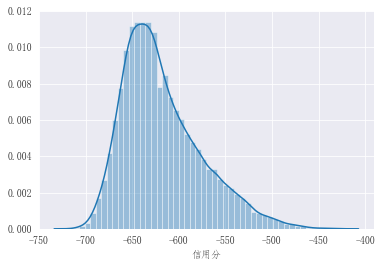

In [6]:
#histogram
sns.distplot(-train['信用分']);

In [7]:
print("Skewness: %f" % train['信用分'].skew())
print("Kurtosis: %f" % train['信用分'].kurt())

Skewness: -0.863670
Kurtosis: 0.551228


# 数据处理

### 1.部分数据可视化

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002456B14F2E8>]],
      dtype=object)

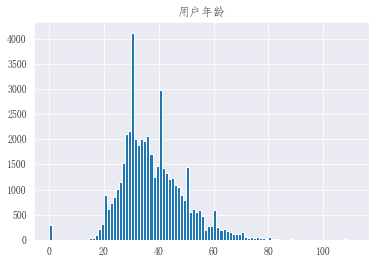

In [7]:
train.hist(column="用户年龄",bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002456B2EA128>]],
      dtype=object)

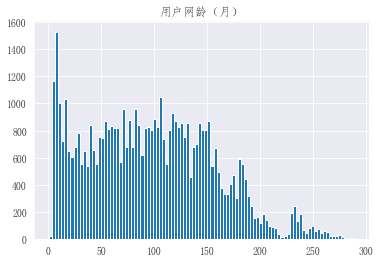

In [8]:
train.hist(column="用户网龄（月）",bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002456B530748>]],
      dtype=object)

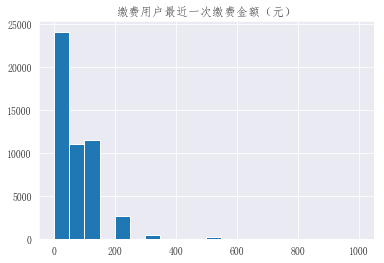

In [11]:
train.hist(column="缴费用户最近一次缴费金额（元）",bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002456B7A9C18>]],
      dtype=object)

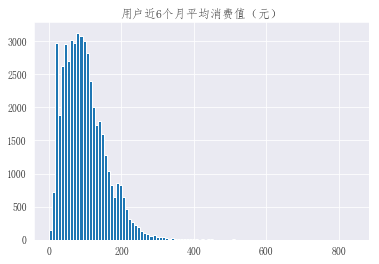

In [12]:
train.hist(column="用户近6个月平均消费值（元）",bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002456B7ECA58>]],
      dtype=object)

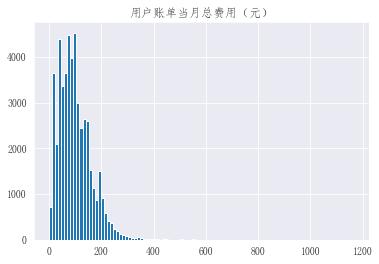

In [13]:
train.hist(column="用户账单当月总费用（元）",bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002456B95B358>]],
      dtype=object)

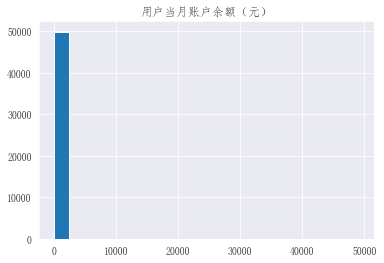

In [14]:
train.hist(column="用户当月账户余额（元）",bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002456BAA3CC0>]],
      dtype=object)

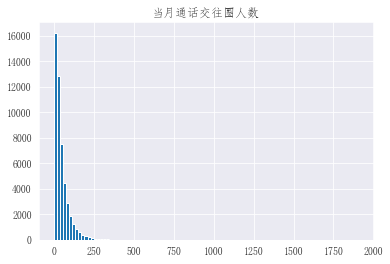

In [15]:
train.hist(column="当月通话交往圈人数",bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002456B7B8400>]],
      dtype=object)

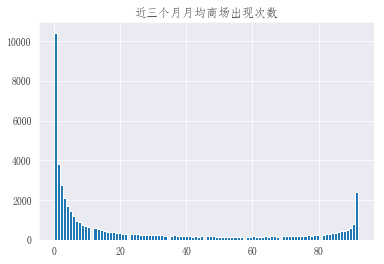

In [16]:
train.hist(column="近三个月月均商场出现次数",bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002456B5BFC50>]],
      dtype=object)

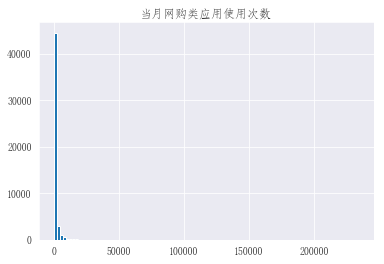

In [17]:
train.hist(column="当月网购类应用使用次数",bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002456BD52128>]],
      dtype=object)

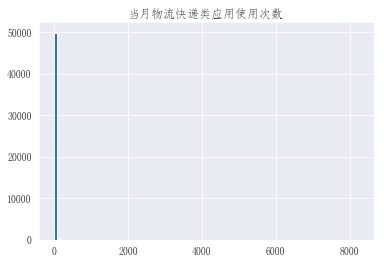

In [18]:
train.hist(column="当月物流快递类应用使用次数",bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002456BE7FF98>]],
      dtype=object)

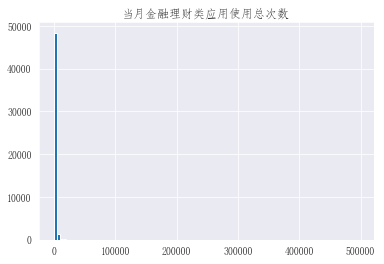

In [19]:
train.hist(column="当月金融理财类应用使用总次数",bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002456C0BCDA0>]],
      dtype=object)

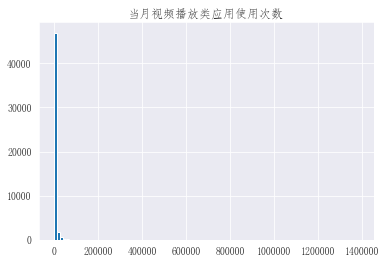

In [20]:
train.hist(column="当月视频播放类应用使用次数",bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002456C0F7BA8>]],
      dtype=object)

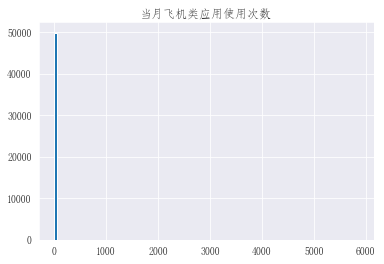

In [21]:
train.hist(column="当月飞机类应用使用次数",bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002456CBD8C50>]],
      dtype=object)

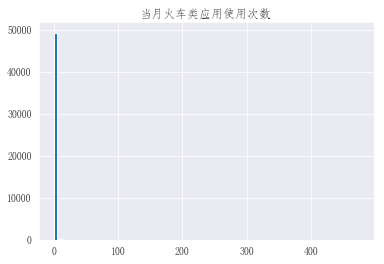

In [22]:
train.hist(column="当月火车类应用使用次数",bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002456CCC79E8>]],
      dtype=object)

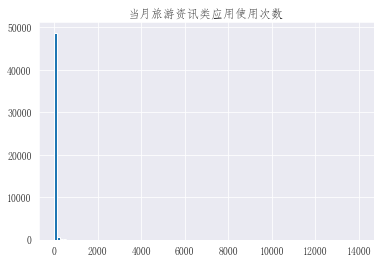

In [23]:
train.hist(column="当月旅游资讯类应用使用次数",bins=100)

##### 处理长尾分布

In [31]:
#对'用户网龄（月）'进行log2处理
train['用户网龄（月）'] = np.log2(train['用户网龄（月）']+1)
train.rename(columns={'用户网龄（月）':'用户网龄（月）_log2'},inplace = True)
#对'缴费用户最近一次缴费金额（元）'进行log2处理
train['缴费用户最近一次缴费金额（元）'] = np.log2(train['缴费用户最近一次缴费金额（元）']+1)
train.rename(columns={'缴费用户最近一次缴费金额（元）':'缴费用户最近一次缴费金额（元）_log2'},inplace = True)
#对'用户近6个月平均消费值（元）'进行log2处理
train['用户近6个月平均消费值（元）'] = np.log2(train['用户近6个月平均消费值（元）']+1)
train.rename(columns={'用户近6个月平均消费值（元）':'用户近6个月平均消费值（元）_log2'},inplace = True)
#对'用户账单当月总费用（元）'进行log2处理
train['用户账单当月总费用（元）'] = np.log2(train['用户账单当月总费用（元）']+1)
train.rename(columns={'用户账单当月总费用（元）':'用户账单当月总费用（元）_log2'},inplace = True)
#对'用户当月账户余额（元）'进行loglp处理
train['用户当月账户余额（元）'] = np.log1p(train['用户当月账户余额（元）'])
train.rename(columns={'用户当月账户余额（元）':'用户当月账户余额（元）_log'},inplace = True)


#### 处理分类数据？

In [ ]:
data=pd.get_dummies(data,columns=['用户话费敏感度'],prefix='用户话费敏感度')

In [ ]:
Index(['用户实名制是否通过核实', '用户年龄', '是否大学生客户', '是否黑名单客户', '是否4G不健康客户', '用户网龄（月）',
       '用户最近一次缴费距今时长（月）', '缴费用户最近一次缴费金额（元）', '用户近6个月平均消费值（元）', '用户账单当月总费用（元）',
       '用户当月账户余额（元）', '缴费用户当前是否欠费缴费', '用户话费敏感度', '当月通话交往圈人数', '是否经常逛商场的人',
       '近三个月月均商场出现次数', '当月是否逛过福州仓山万达', '当月是否到过福州山姆会员店', '当月是否看电影', '当月是否景点游览',
       '当月是否体育场馆消费', '当月网购类应用使用次数', '当月物流快递类应用使用次数', '当月金融理财类应用使用总次数',
       '当月视频播放类应用使用次数', '当月飞机类应用使用次数', '当月火车类应用使用次数', '当月旅游资讯类应用使用次数', '信用分',
       'data_type'],

### 2.各特征与信用分布图

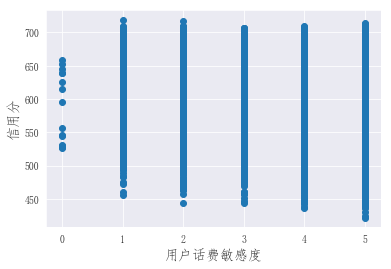

In [27]:
fig, ax = plt.subplots()
ax.scatter(x = train['用户话费敏感度'], y = train['信用分'])
plt.ylabel('信用分', fontsize=14)
plt.xlabel('用户话费敏感度', fontsize=14)
plt.show()

In [28]:
Index(['用户实名制是否通过核实', '用户年龄', '是否大学生客户', '是否黑名单客户', '是否4G不健康客户', '用户网龄（月）',
       '用户最近一次缴费距今时长（月）', '缴费用户最近一次缴费金额（元）', '用户近6个月平均消费值（元）', '用户账单当月总费用（元）',
       '用户当月账户余额（元）', '缴费用户当前是否欠费缴费', '用户话费敏感度', '当月通话交往圈人数', '是否经常逛商场的人',
       '近三个月月均商场出现次数', '当月是否逛过福州仓山万达', '当月是否到过福州山姆会员店', '当月是否看电影', '当月是否景点游览',
       '当月是否体育场馆消费', '当月网购类应用使用次数', '当月物流快递类应用使用次数', '当月金融理财类应用使用总次数',
       '当月视频播放类应用使用次数', '当月飞机类应用使用次数', '当月火车类应用使用次数', '当月旅游资讯类应用使用次数', '信用分',
       'data_type'],

SyntaxError: unexpected EOF while parsing (<ipython-input-28-33bd541818cf>, line 7)

In [ ]:
data.shape

In [ ]:
#box plot overallqual/saleprice
var = '用户网龄（月）_log2'
data = pd.concat([train['信用分'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="信用分", data=data)
fig.axis(ymin=400, ymax=800);

In [ ]:
#box plot overallqual/saleprice
var = '用户网龄（月）'
data = pd.concat([train['信用分'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="信用分", data=data)
fig.axis(ymin=400, ymax=800);

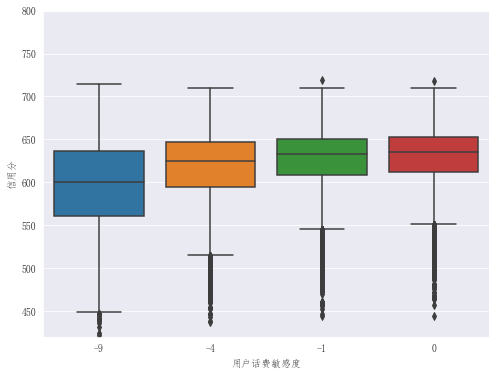

In [29]:
#box plot overallqual/saleprice
var = '用户话费敏感度'
data = pd.concat([train['信用分'], -(train[var]-2)*(train[var]-2)], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="信用分", data=data)
fig.axis(ymin=420, ymax=800);

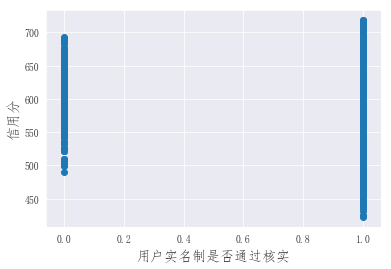

In [49]:
fig, ax = plt.subplots()
ax.scatter(x = train['用户实名制是否通过核实'], y = train['信用分'])
plt.ylabel('信用分', fontsize=14)
plt.xlabel('用户实名制是否通过核实', fontsize=14)
plt.show()

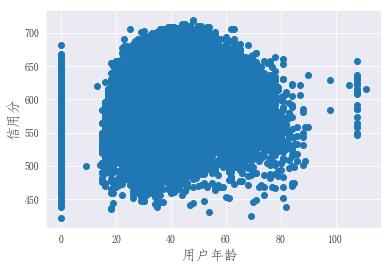

In [50]:
fig, ax = plt.subplots()
ax.scatter(x = train['用户年龄'], y = train['信用分'])
plt.ylabel('信用分', fontsize=14)
plt.xlabel('用户年龄 ', fontsize=14)
plt.show()

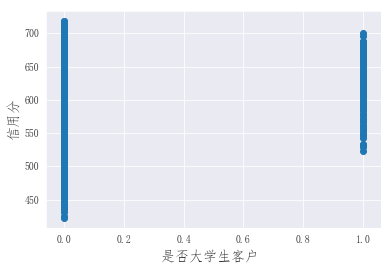

In [51]:
fig, ax = plt.subplots()
ax.scatter(x = train['是否大学生客户'], y = train['信用分'])
plt.ylabel('信用分', fontsize=14)
plt.xlabel('是否大学生客户 ', fontsize=14)
plt.show()

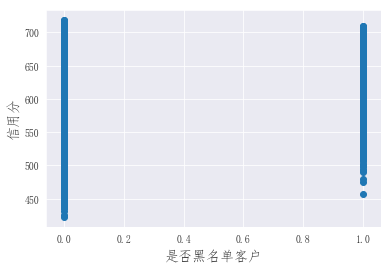

In [52]:
fig, ax = plt.subplots()
ax.scatter(x = train['是否黑名单客户'], y = train['信用分'])
plt.ylabel('信用分', fontsize=14)
plt.xlabel('是否黑名单客户', fontsize=14)
plt.show()

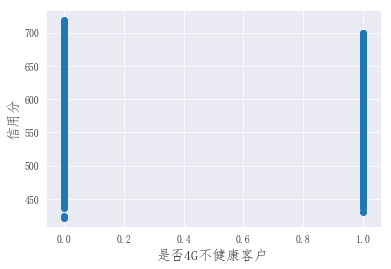

In [53]:
fig, ax = plt.subplots()
ax.scatter(x = train['是否4G不健康客户'], y = train['信用分'])
plt.ylabel('信用分', fontsize=14)
plt.xlabel('是否4G不健康客户', fontsize=14)
plt.show()

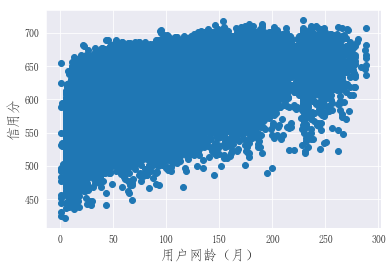

In [54]:
fig, ax = plt.subplots()
ax.scatter(x = train['用户网龄（月）'], y = train['信用分'])
plt.ylabel('信用分', fontsize=14)
plt.xlabel('用户网龄（月） ', fontsize=14)
plt.show()

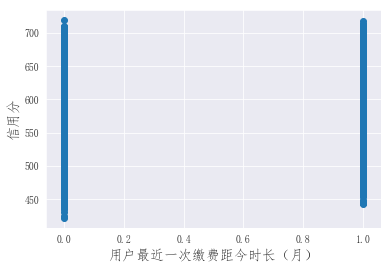

In [55]:
fig, ax = plt.subplots()
ax.scatter(x = train['用户最近一次缴费距今时长（月）'], y = train['信用分'])
plt.ylabel('信用分', fontsize=14)
plt.xlabel('用户最近一次缴费距今时长（月）', fontsize=14)
plt.show()

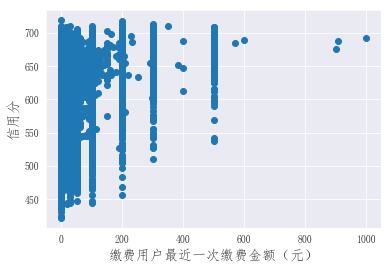

In [57]:
fig, ax = plt.subplots()
ax.scatter(x = train['缴费用户最近一次缴费金额（元）'], y = train['信用分'])
plt.ylabel('信用分', fontsize=14)
plt.xlabel('缴费用户最近一次缴费金额（元）', fontsize=14)
plt.show()

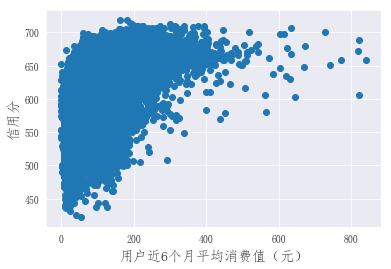

In [58]:
fig, ax = plt.subplots()
ax.scatter(x = train['用户近6个月平均消费值（元）'], y = train['信用分'])
plt.ylabel('信用分', fontsize=14)
plt.xlabel('用户近6个月平均消费值（元）', fontsize=14)
plt.show()

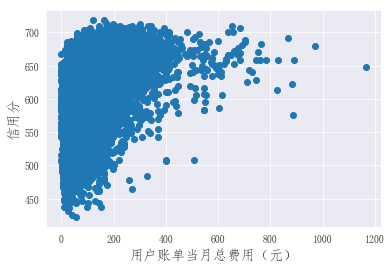

In [59]:
fig, ax = plt.subplots()
ax.scatter(x = train['用户账单当月总费用（元）'], y = train['信用分'])
plt.ylabel('信用分', fontsize=14)
plt.xlabel('用户账单当月总费用（元）', fontsize=14)
plt.show()

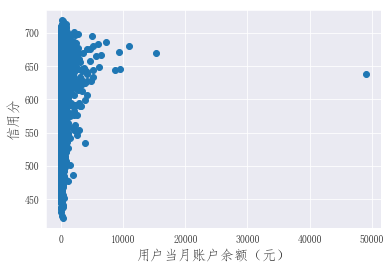

In [60]:
fig, ax = plt.subplots()
ax.scatter(x = train['用户当月账户余额（元）'], y = train['信用分'])
plt.ylabel('信用分', fontsize=14)
plt.xlabel('用户当月账户余额（元）', fontsize=14)
plt.show()

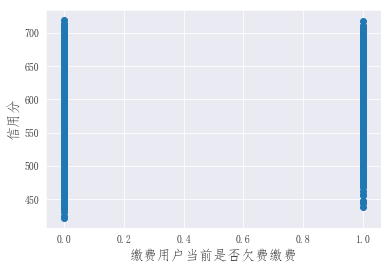

In [61]:
fig, ax = plt.subplots()
ax.scatter(x = train['缴费用户当前是否欠费缴费'], y = train['信用分'])
plt.ylabel('信用分', fontsize=14)
plt.xlabel('缴费用户当前是否欠费缴费', fontsize=14)
plt.show()

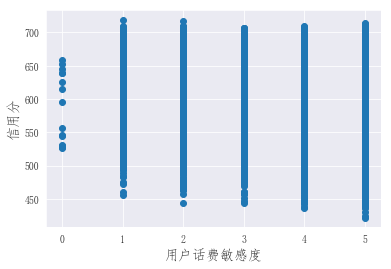

In [62]:
fig, ax = plt.subplots()
ax.scatter(x = train['用户话费敏感度'], y = train['信用分'])
plt.ylabel('信用分', fontsize=14)
plt.xlabel('用户话费敏感度', fontsize=14)
plt.show()

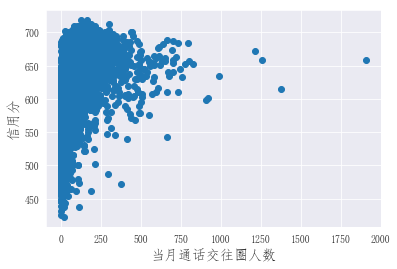

In [63]:
fig, ax = plt.subplots()
ax.scatter(x = train['当月通话交往圈人数'], y = train['信用分'])
plt.ylabel('信用分', fontsize=14)
plt.xlabel('当月通话交往圈人数', fontsize=14)
plt.show()

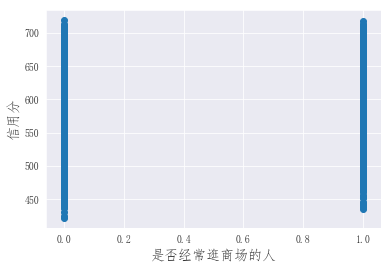

In [64]:
fig, ax = plt.subplots()
ax.scatter(x = train['是否经常逛商场的人'], y = train['信用分'])
plt.ylabel('信用分', fontsize=14)
plt.xlabel('是否经常逛商场的人', fontsize=14)
plt.show()

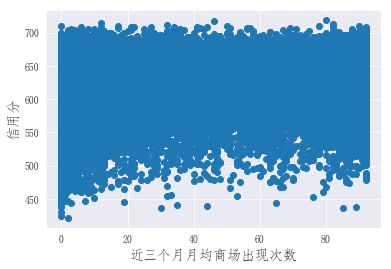

In [65]:
fig, ax = plt.subplots()
ax.scatter(x = train['近三个月月均商场出现次数'], y = train['信用分'])
plt.ylabel('信用分', fontsize=14)
plt.xlabel('近三个月月均商场出现次数', fontsize=14)
plt.show()

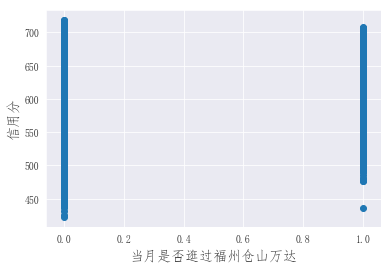

In [66]:
fig, ax = plt.subplots()
ax.scatter(x = train['当月是否逛过福州仓山万达'], y = train['信用分'])
plt.ylabel('信用分', fontsize=14)
plt.xlabel('当月是否逛过福州仓山万达', fontsize=14)
plt.show()

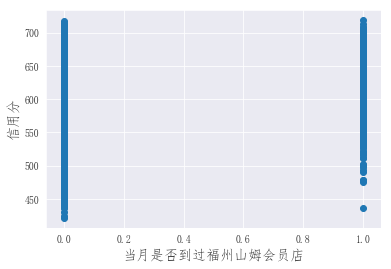

In [67]:
fig, ax = plt.subplots()
ax.scatter(x = train['当月是否到过福州山姆会员店'], y = train['信用分'])
plt.ylabel('信用分', fontsize=14)
plt.xlabel('当月是否到过福州山姆会员店', fontsize=14)
plt.show()

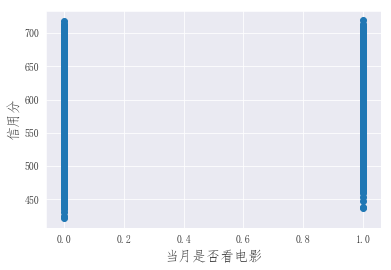

In [68]:
fig, ax = plt.subplots()
ax.scatter(x = train['当月是否看电影'], y = train['信用分'])
plt.ylabel('信用分', fontsize=14)
plt.xlabel('当月是否看电影', fontsize=14)
plt.show()

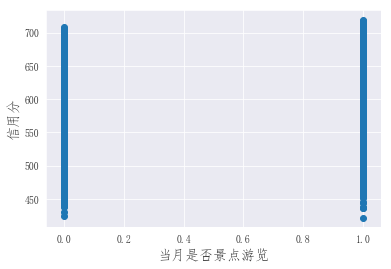

In [69]:
fig, ax = plt.subplots()
ax.scatter(x = train['当月是否景点游览'], y = train['信用分'])
plt.ylabel('信用分', fontsize=14)
plt.xlabel('当月是否景点游览', fontsize=14)
plt.show()

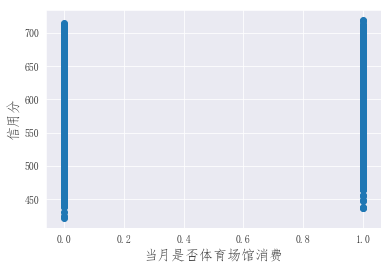

In [70]:
fig, ax = plt.subplots()
ax.scatter(x = train['当月是否体育场馆消费'], y = train['信用分'])
plt.ylabel('信用分', fontsize=14)
plt.xlabel('当月是否体育场馆消费', fontsize=14)
plt.show()

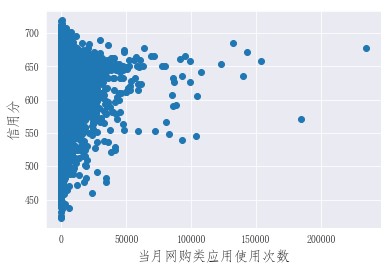

In [71]:
fig, ax = plt.subplots()
ax.scatter(x = train['当月网购类应用使用次数'], y = train['信用分'])
plt.ylabel('信用分', fontsize=14)
plt.xlabel('当月网购类应用使用次数', fontsize=14)
plt.show()

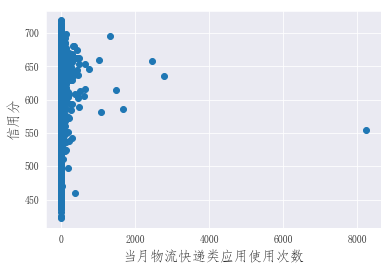

In [72]:
fig, ax = plt.subplots()
ax.scatter(x = train['当月物流快递类应用使用次数'], y = train['信用分'])
plt.ylabel('信用分', fontsize=14)
plt.xlabel('当月物流快递类应用使用次数', fontsize=14)
plt.show()

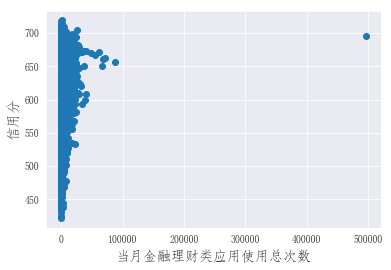

In [73]:
fig, ax = plt.subplots()
ax.scatter(x = train['当月金融理财类应用使用总次数'], y = train['信用分'])
plt.ylabel('信用分', fontsize=14)
plt.xlabel('当月金融理财类应用使用总次数', fontsize=14)
plt.show()

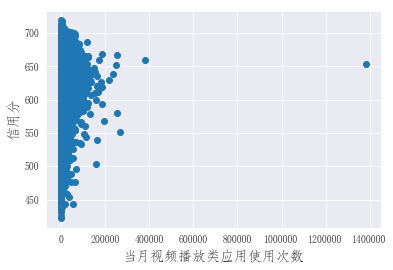

In [74]:
fig, ax = plt.subplots()
ax.scatter(x = train['当月视频播放类应用使用次数'], y = train['信用分'])
plt.ylabel('信用分', fontsize=14)
plt.xlabel('当月视频播放类应用使用次数', fontsize=14)
plt.show()

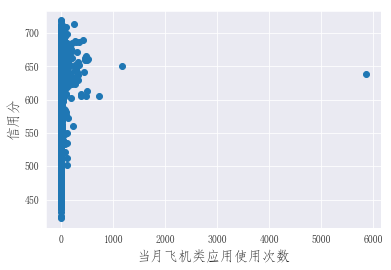

In [75]:
fig, ax = plt.subplots()
ax.scatter(x = train['当月飞机类应用使用次数'], y = train['信用分'])
plt.ylabel('信用分', fontsize=14)
plt.xlabel('当月飞机类应用使用次数', fontsize=14)
plt.show()

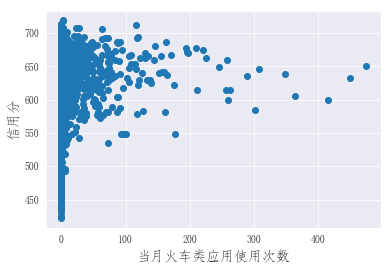

In [76]:
fig, ax = plt.subplots()
ax.scatter(x = train['当月火车类应用使用次数'], y = train['信用分'])
plt.ylabel('信用分', fontsize=14)
plt.xlabel('当月火车类应用使用次数', fontsize=14)
plt.show()

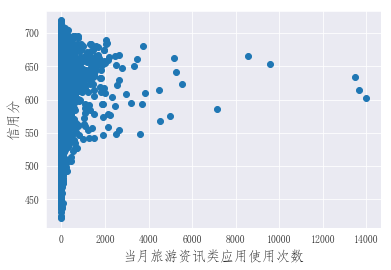

In [77]:
fig, ax = plt.subplots()
ax.scatter(x = train['当月旅游资讯类应用使用次数'], y = train['信用分'])
plt.ylabel('信用分', fontsize=14)
plt.xlabel('当月旅游资讯类应用使用次数', fontsize=14)
plt.show()

In [6]:
train['信用分'].describe()

count   50000.000
mean      618.053
std        42.443
min       422.000
25%       594.000
50%       627.000
75%       649.000
max       719.000
Name: 信用分, dtype: float64

#### 线性的模型需要正态分布的目标值才能发挥最大的作用


 mu = 618.05 and sigma = 42.44



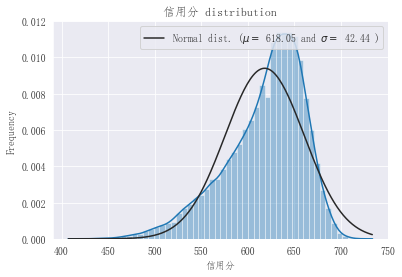

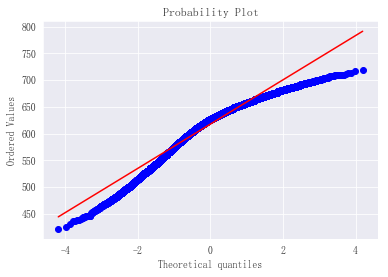

In [14]:
sns.distplot(train['信用分'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['信用分'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('信用分 distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['信用分'], plot=plt)
plt.show()

In [16]:
np.sqrt

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [15]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["信用分"] = (train["信用分"]-618.05)/42.44

#Check the new distribution 
sns.distplot(train['信用分'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['信用分'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('信用分 distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['信用分'], plot=plt)
plt.show()

AttributeError: 'map' object has no attribute 'log'

#### 特征相关性

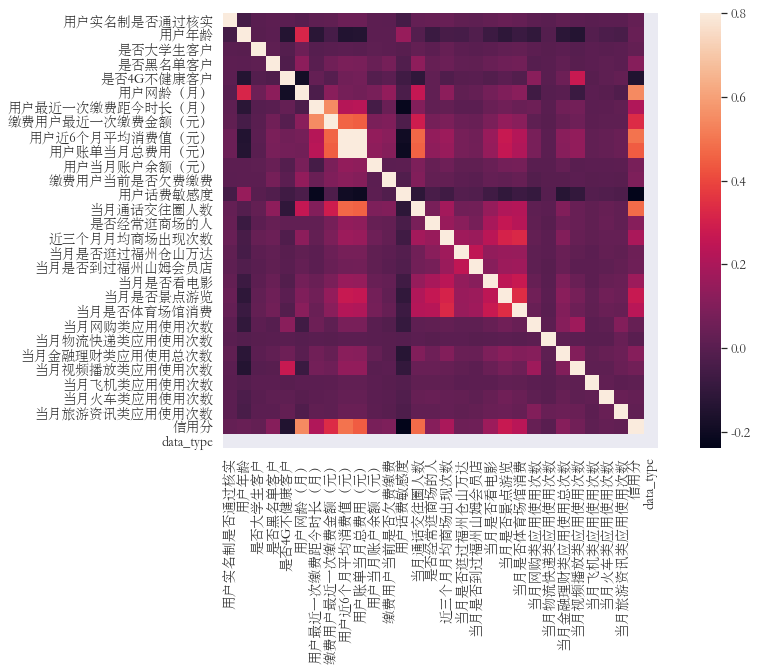

In [59]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(15,8))
sns.heatmap(corrmat, vmax=0.8, square=True)

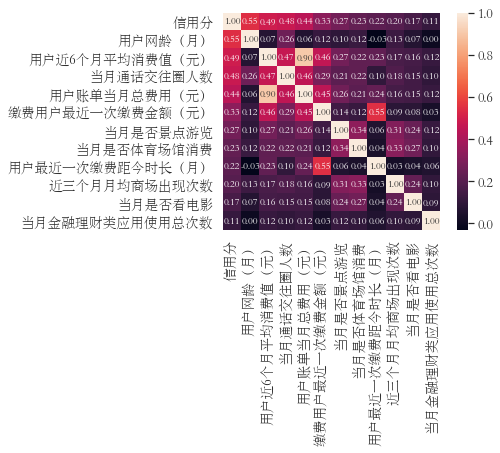

In [61]:
#saleprice correlation matrix
k = 12 #number of variables for heatmap
cols = corrmat.nlargest(k, '信用分')['信用分'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25,font='STSong')
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [4]:
train.columns

Index(['用户实名制是否通过核实', '用户年龄', '是否大学生客户', '是否黑名单客户', '是否4G不健康客户', '用户网龄（月）',
       '用户最近一次缴费距今时长（月）', '缴费用户最近一次缴费金额（元）', '用户近6个月平均消费值（元）', '用户账单当月总费用（元）',
       '用户当月账户余额（元）', '缴费用户当前是否欠费缴费', '用户话费敏感度', '当月通话交往圈人数', '是否经常逛商场的人',
       '近三个月月均商场出现次数', '当月是否逛过福州仓山万达', '当月是否到过福州山姆会员店', '当月是否看电影', '当月是否景点游览',
       '当月是否体育场馆消费', '当月网购类应用使用次数', '当月物流快递类应用使用次数', '当月金融理财类应用使用总次数',
       '当月视频播放类应用使用次数', '当月飞机类应用使用次数', '当月火车类应用使用次数', '当月旅游资讯类应用使用次数', '信用分',
       'data_type'],
      dtype='object')

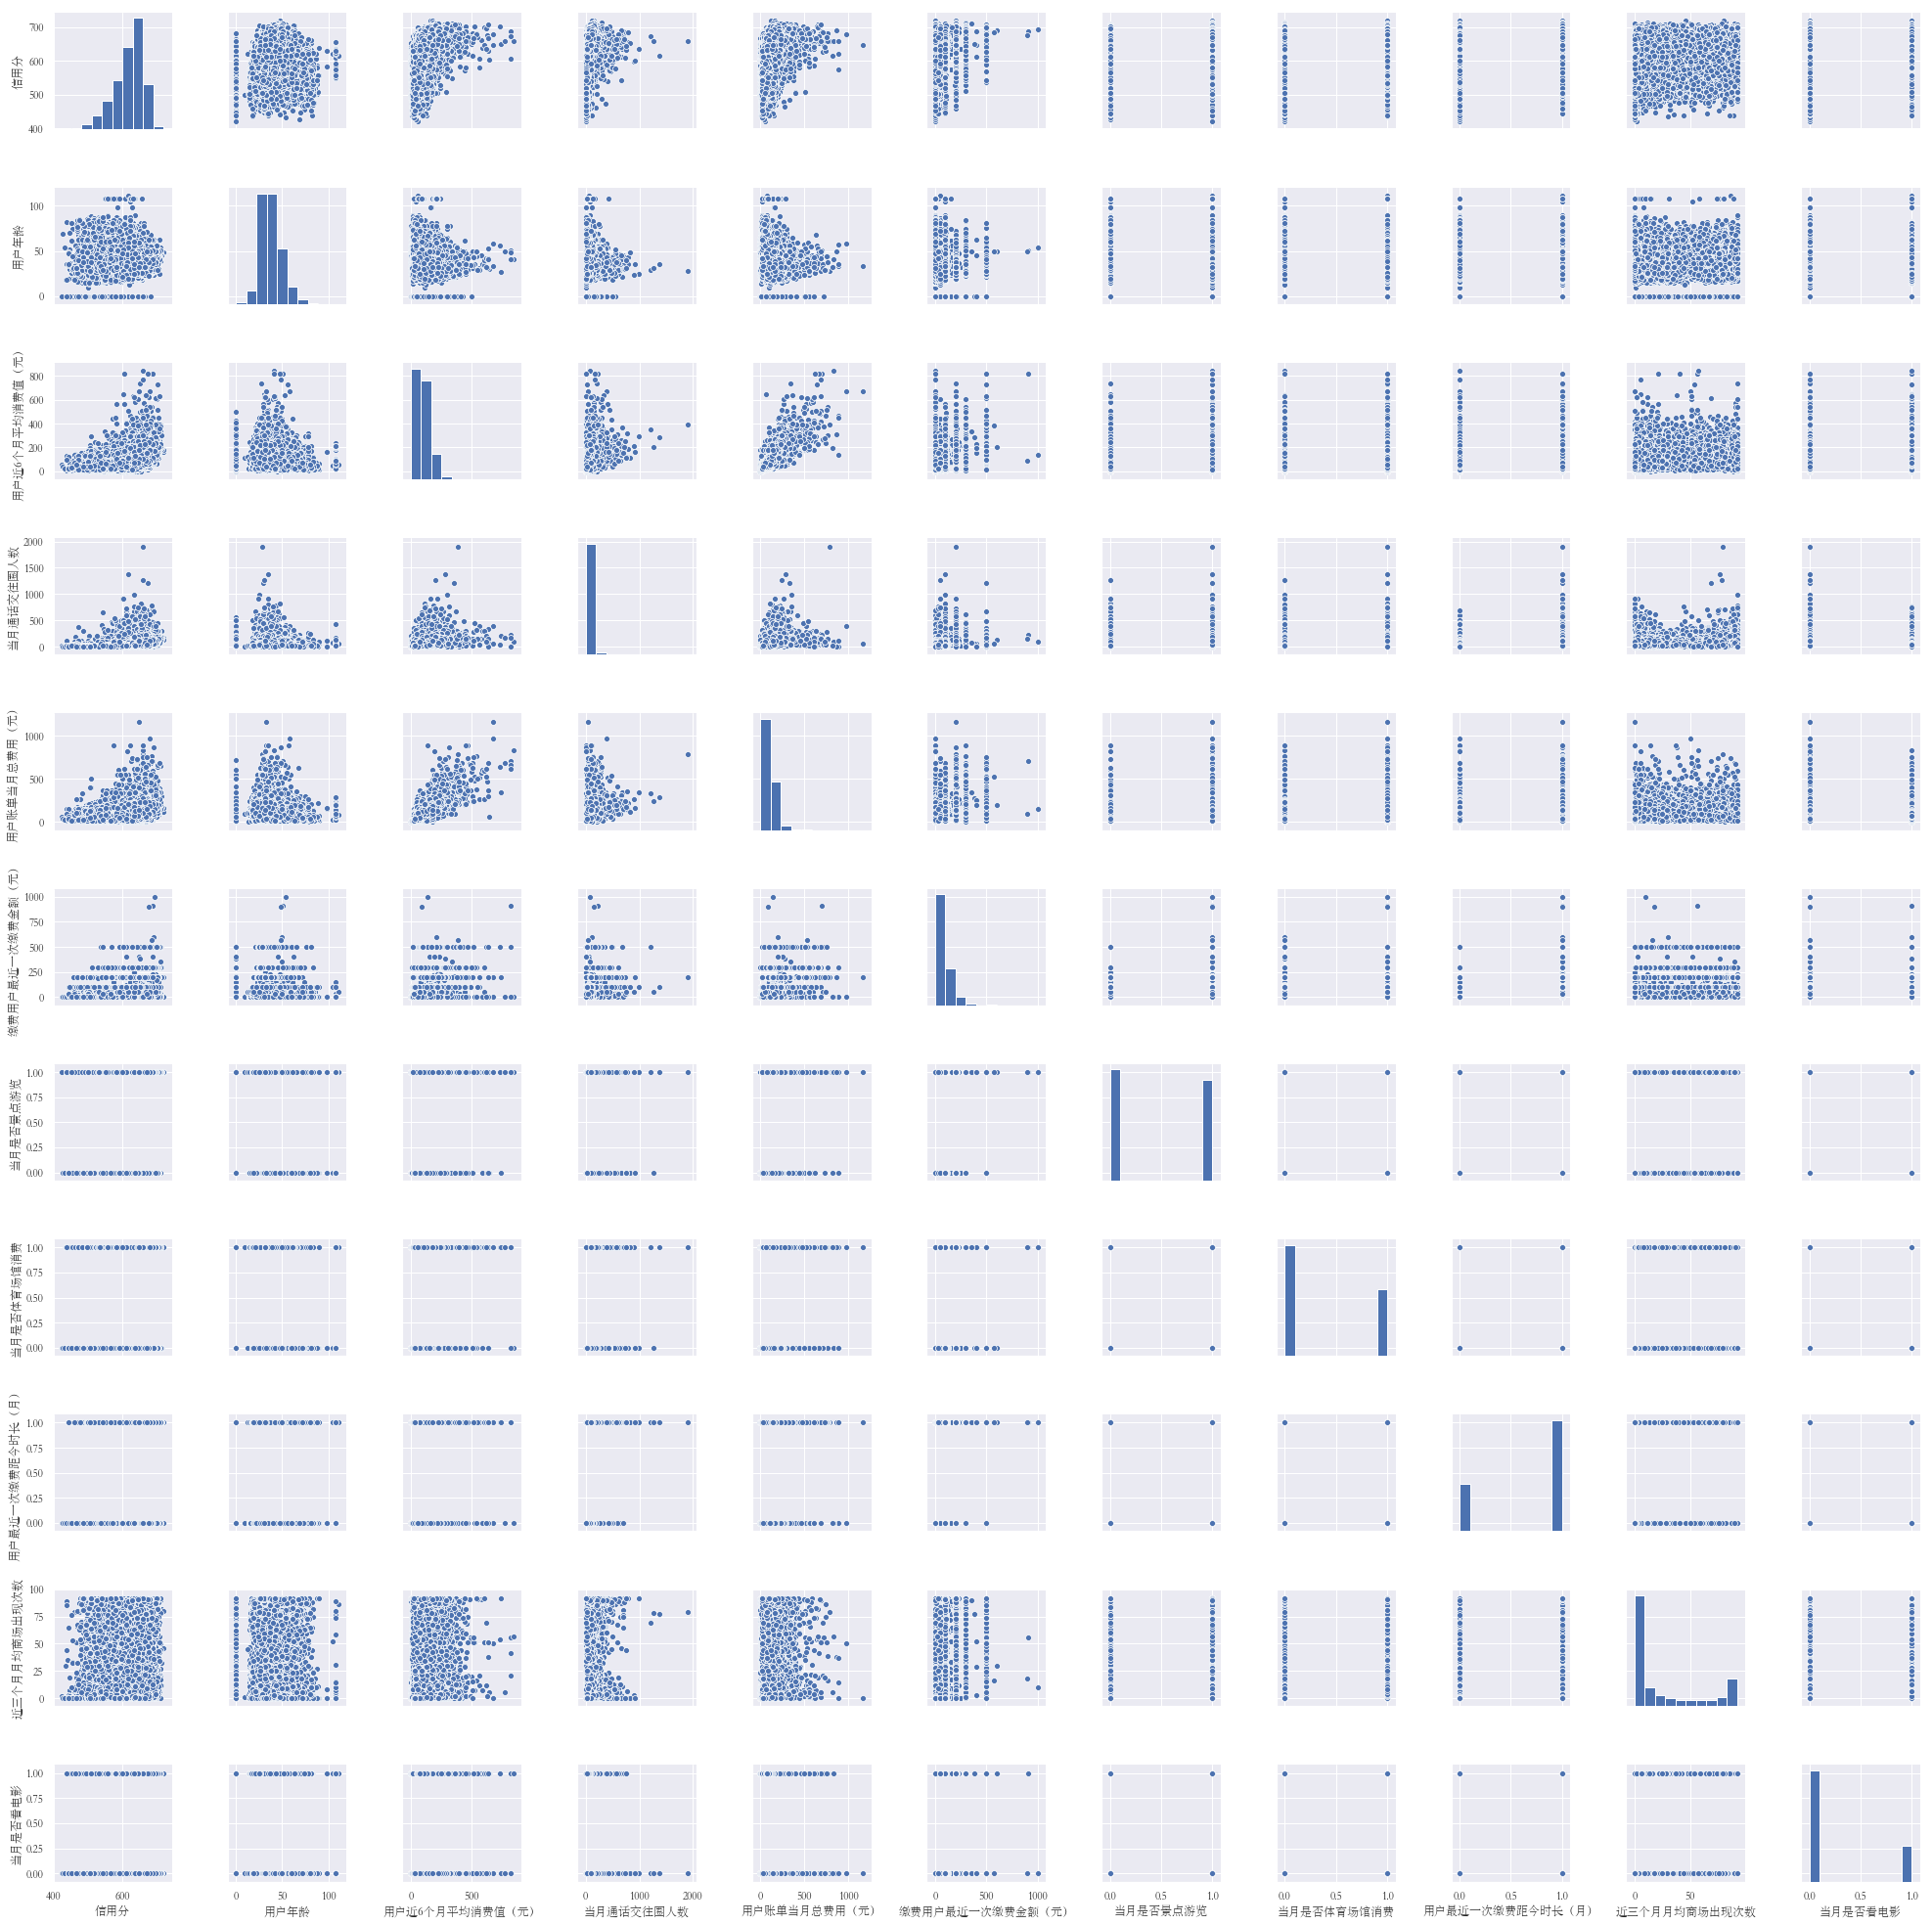

In [74]:
#scatterplot
sns.set(font='STSong')
cols = ['信用分', '用户年龄', '用户近6个月平均消费值（元）', '当月通话交往圈人数', '用户账单当月总费用（元）', 
        '缴费用户最近一次缴费金额（元）', '当月是否景点游览', '当月是否体育场馆消费', '用户最近一次缴费距今时长（月）',
        '近三个月月均商场出现次数','当月是否看电影']
sns.pairplot(train[cols], size = 2.5)
plt.show();

#### 合并数据

In [59]:
score=train['信用分']
train=train.drop(["信用分"],axis=1)
data=pd.concat((train,test),axis=0)
print("all_data size is : {}".format(data.shape))

all_data size is : (100000, 29)


#### 处理缺失数据

In [62]:
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(20)

,Missing Ratio


### 创造特征

In [81]:
diff_feature_list = ['用户网龄（月）','用户最近一次缴费距今时长（月）','缴费用户最近一次缴费金额（元）',
                     '用户近6个月平均消费值（元）','用户账单当月总费用（元）','用户当月账户余额（元）'
                    ]

data['diff_用户近6个月平均消费值（元）_缴费用户最近一次缴费金额（元）'] = data['用户近6个月平均消费值（元）'] - data['缴费用户最近一次缴费金额（元）']
data['diff_用户近6个月平均消费值（元）_用户账单当月总费用（元）'] = data['用户近6个月平均消费值（元）']- data['用户账单当月总费用（元）']
data['diff_用户近6个月平均消费值（元）_用户当月账户余额（元）'] = data['用户近6个月平均消费值（元）'] - data['用户当月账户余额（元）']
data['diff_用户账单当月总费用（元）_用户当月账户余额（元）'] = data['用户账单当月总费用（元）'] - data['用户当月账户余额（元）']
data['diff_用户账单当月总费用（元）_缴费用户最近一次缴费金额（元）'] = data['用户账单当月总费用（元）'] - data['缴费用户最近一次缴费金额（元）']
    
data['ratio_用户近6个月平均消费值（元）/缴费用户最近一次缴费金额（元）'] = data['用户近6个月平均消费值（元）'] /(data['缴费用户最近一次缴费金额（元）']+1)
data['ratio_用户近6个月平均消费值（元）/用户账单当月总费用（元）'] = data['用户近6个月平均消费值（元）']/( data['用户账单当月总费用（元）']+1)
data['ratio_用户近6个月平均消费值（元）/用户当月账户余额（元）'] = data['用户近6个月平均消费值（元）'] /( data['用户当月账户余额（元）']+1)
data['ratio_用户账单当月总费用（元）/用户当月账户余额（元）'] = data['用户账单当月总费用（元）'] /(data['用户当月账户余额（元）']+1)
data['ratio_用户账单当月总费用（元）/缴费用户最近一次缴费金额（元）'] = data['用户账单当月总费用（元）'] /( data['缴费用户最近一次缴费金额（元）']+1)

### 数据标准化

In [25]:
data_columns=data.columns
data_index=data.index
from sklearn.preprocessing import MinMaxScaler# 对数据缩放
# 构造输入特征的标准化器
MS = MinMaxScaler()
data_Scaler = MS.fit_transform(data)
data=pd.DataFrame(data_Scaler,columns=data_columns,index=data_index)

D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### 分割数据集

In [28]:
train_data = data[(data.data_type == 0)]
test_data = data[(data.data_type == 1)]
train_data=pd.concat([train_data,score],axis=1)
train_data.to_csv(dpath +'train_data_raw.csv',index=True)
test_data.to_csv(dpath +'test_data_raw.csv',index=True)